In [1]:
import pandas as pd
data = pd.read_csv("movie.csv",encoding = 'utf_8_sig')
data.head()

,Unnamed: 0,電影,ID
0,0,<h1>一世狂野</h1>,1
1,1,<h1>玩命關頭</h1>,2
2,2,<h1>戰雲密佈</h1>,3
3,3,<h1>騎士風雲錄</h1>,4
4,4,<h1>金法尤物</h1>,5


In [2]:
row,col = data.shape

In [3]:
data['唯一分類'] = "create"
for i in range(0,row):
    movie_type = data['唯一分類'][i][2:4]
    data.loc[i,'唯一分類'] = movie_type
data

,Unnamed: 0,電影,ID,唯一分類
0,0,<h1>一世狂野</h1>,1,ea
1,1,<h1>玩命關頭</h1>,2,ea
2,2,<h1>戰雲密佈</h1>,3,ea
3,3,<h1>騎士風雲錄</h1>,4,ea
4,4,<h1>金法尤物</h1>,5,ea
...,...,...,...,...
7245,7245,<h1>巴黎之王：闇黑正義</h1>,9995,ea
7246,7246,<h1>米其林遇見米其林</h1>,9996,ea
7247,7247,<h1>親愛的仇人</h1>,9997,ea
7248,7248,<h1>非分熟女</h1>,9998,ea


In [4]:
data.to_csv('movie_new.csv', encoding='utf_8_sig' , index = False)

In [5]:
from sklearn.model_selection import train_test_split

train_data , test_data = train_test_split(data, random_state = 42,test_size=0.2)

/Users/ivan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35347 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ivan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32244 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ivan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ivan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ivan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39006 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ivan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backe

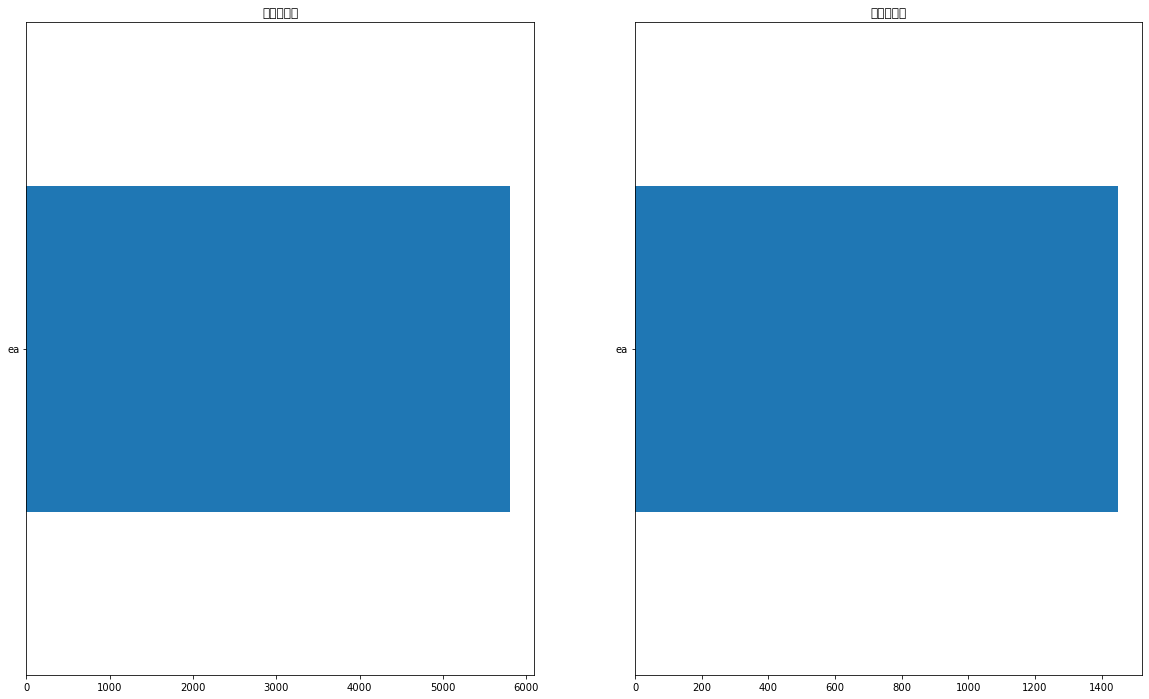

In [6]:
import matplotlib.pyplot as plt

plt.figure( figsize = (20,12))
plt.subplot(1,2,1)
train_data["唯一分類"].value_counts().sort_index().plot( kind = "barh", title = "訓練集分類")

plt.subplot(1,2,2)
test_data["唯一分類"].value_counts().sort_index().plot( kind = "barh", title = "測試集分類")

In [9]:
import jieba
import re

def content_cut(text):
    specialChars = "!#$%^&*()《  》"
    text = text.replace("★" , "").replace("\r\n" , "").replace(specialChars,"")
    return " ".join(list(jieba.cut(text)))
#train_data.columns.tolist()
#train_data = content_cut(train_data)
#test_data = content_cut(test_data)
train_data['分詞劇情'] = train_data['劇情介紹'].map(content_cut)
test_data['分詞劇情'] = test_data['劇情介紹'].map(content_cut)
#train_data["分詞新分類"] = train_data["新分類"].map(content_cut)
#test_data["分詞新分類"] = train_data["新分類"].map(content_cut)

KeyError: '分詞劇情'

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=None, token_pattern="(?u)\\b\\w+\\b")
X_train = vectorizer.fit_transform(train_data["分詞劇情"])
X_test = vectorizer.transform(test_data["分詞劇情"])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=51,weights="distance")
knn.fit(X_train, train_data["唯一分類"])

In [ ]:
Y_test = knn.predict(X_test)

In [ ]:
socre=knn.score(X_test,test_data["唯一分類"])
print('精準度:{:2f}'.format(socre))